<a href="https://colab.research.google.com/github/m0ckers/Data_Viz/blob/main/Visualizzazioni_progetto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizzazioni interattive

In [ ]:
import pandas as pd
import altair as alt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.collections import EllipseCollection

sns.set()
sns.set_theme(style='whitegrid')

In [ ]:
df = pd.read_csv('Dataset_Unico.csv')

## Serie temporale

In [ ]:
selection = alt.selection_multi(fields=['Region'], init=[{'Region': 'Central and Eastern Europe'}, {'Region': 'Western Europe'}], bind='legend')
color = alt.condition(selection,
          alt.Color('Region:N', 
                    legend=None, 
                    scale=alt.Scale(scheme='category10')),
          alt.value('lightgray')
        )

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover', fields=['Year'], empty='none')

# The basic line
plot_title = alt.TitleParams(
  text=["Andamento del punteggio di felicità nelle regioni", "del mondo dal 2015 al 2021"], 
  subtitle=["Il grafico mostra il cambiamento dei punteggi di felicità riferiti alle regioni del mondo dall'anno 2015 all'anno 2021. ", 
            "Posizionando il mouse in corrispondenza dei punti evidenziati sugli andamenti, è possibile visualizzare una legenda che",
            " riepiloga i dati di riferimento, ovvero: l'anno, la regione e il punteggio di felicità considerato.", "",
            " Tramite le fasce colorate vengono mostrati gli intervalli di confidenza relativi agli indici di tendenza centrale di ogni",
            " regione (la media). L’intervallo di confidenza contiene con una probabilità del 95% la vera caratteristica della ",
            " popolazione (punteggio di felicità).", " "],
  align= "left",
  anchor="start",
  fontWeight = "bold",
  fontSize=25,
  color="black",
  subtitleColor="gray",
  subtitlePadding=15,
  subtitleFontSize=14 )

line = alt.Chart(df, title=plot_title).mark_line(interpolate='basis').encode(
  x='Year:O',
  y=alt.Y('mean(Happiness Score):Q', scale=alt.Scale(domain=[3, 7.5])),
  color=alt.Color('Region:N'),
  tooltip=[
    alt.Tooltip('Year:O', title='Anno'),
    alt.Tooltip('mean(Happiness Score):Q', title='Media Punteggi Felicità', format=',.3r'),
    alt.Tooltip('Region:N', title='Regione')
  ]
).transform_filter(
  selection
).properties(
  width=700,
  height=500
)

# aggiungo intervalli di confidenza
band = line.mark_errorband(extent='ci').encode(
  y=alt.Y('Happiness Score:Q', axis=alt.Axis(title='')),
  opacity=alt.value(0.2)
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(df).mark_point().encode(
  x='Year:O',
  y=alt.Y('mean(Happiness Score):Q', scale=alt.Scale(domain=[3, 7.5]), axis=alt.Axis(title='Media Punteggi Felicità', titleFontSize=15, titlePadding=15)),
  color=alt.Color('Region:N'),
  opacity=alt.value(0)
).add_selection(
    nearest, selection
).interactive()

# legenda
legend_title = alt.TitleParams(
  text=" ", 
  subtitle=["Per selezionare più regioni tenere premuto",
            "SHIFT (maiuscolo) e contemporaneamente",
            "cliccare sul simbolo grigio corrispondende",
            "alla regione."],
  align= "left",
  fontWeight = "bold",
  fontSize=16,
  color="black",
  subtitleColor="red",
  subtitlePadding=10,
  subtitleFontSize=14,
  anchor="start",

  baseline='bottom',
  orient='bottom',
)

legend = alt.Chart(df, title=legend_title).mark_point(filled=True, size=200).encode(
  y=alt.Y('Region:N', axis=alt.Axis(orient='right', title='Regioni', labelFontSize=12.5, titleAngle=0, titleY=-10, titleX=13, titleFontSize=18)),
  color=color
).add_selection(
  selection
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
  opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5, strokeWidth=2).encode(
    text=alt.condition(nearest, 'mean(Happiness Score):Q', alt.value(' '), format=',.3r')
)

# Draw a rule at the location of the selection
rules = alt.Chart(df).mark_rule(color='gray').encode(
  x=alt.Y('Year:O', axis=alt.Axis(title='Anno', labelAngle=0, labelPadding=10, labelAlign="center", labelFontSize=13, 
                                  titleFontSize=15, titlePadding=15))
).transform_filter(
  nearest
)

In [ ]:
# Put the five layers into a chart and bind the data
chart = line + band + selectors + points + rules + text | legend
chart

alt.HConcatChart(...)

## Lollipop

In [ ]:
df1 = pd.read_csv('Stati_cambiano.csv')
# i primi 5 che MIGLIORANO di più dal 2015 al 2021
migliori_title = alt.TitleParams(
  text=["Stati in cui migliora maggiormente il punteggio di felicità","dall'anno 2015 all'anno 2021"], 
  subtitle=["In questa visualizzazione vengono mostrati i paesi che presentano un'alta variazione in positivo del punteggio di",
            " felicità, valutata nell'arco temporale 2015 - 2021.",
            " È possibile zoommare il range del punteggio di felicità (tramite l'uso del mouse) e spostarsi (tenendo premuto e ",
            " trascinando) lungo l'asse orizzontale del grafico.", " "],
  align= "left",
  anchor="start",
  fontWeight = "bold",
  fontSize=25,
  color="black",
  subtitleColor="gray",
  subtitlePadding=15,
  subtitleFontSize=14 
)

chart_migliori = alt.layer(
    data=df,
    title=migliori_title
).transform_filter(
    filter={"field": 'Country',
           "oneOf": ['Benin', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia']
            }
).transform_filter(
    filter={'field': 'Year',
            "oneOf": [2015, 2021]}
).properties(
  width=500,
  height=150
)

chart_migliori += alt.Chart().mark_line(color='#db646f').encode(
    x=alt.X('Happiness Score:Q', axis=alt.Axis(title='Media Punteggi Felicità', labelFontSize=13, titleFontSize=15, titlePadding=15)),
    y=alt.Y('Country:N', axis=alt.Axis(title='Paese', labelFontSize=13, titleFontSize=15, titlePadding=15)),
    detail='Country:N'
)
# Add points for life expectancy in 2015 & 2021
chart_migliori += alt.Chart().mark_point(
    size=100,
    opacity=1,
    filled=True
).encode(
    x='Happiness Score:Q',
    y='Country:N',
    color=alt.Color('Year:O',
        scale=alt.Scale(
            domain=['2015', '2021'],
            range=['#e6959c', '#911a24']
        ),
        legend=alt.Legend(
          labelFontSize=15,
          titleFontSize=15
        ),
        title="Anno"
    )
).interactive()

###############################################################################

# i primi 5 che PEGGIORANO di più dal 2015 al 2021
peggiori_title = alt.TitleParams(
  text=["Stati in cui peggiora drasticamente il punteggio di felicità","dall'anno 2015 all'anno 2021"], 
  subtitle=["In questa visualizzazione vengono mostrati i paesi che presentano un'alta variazione in negativo del punteggio di",
            " felicità, valutata nell'arco temporale 2015 - 2021. ",
            " È possibile zoommare il range del punteggio di felicità (tramite l'uso del mouse) e spostarsi (tenendo premuto e ",
            " trascinando) lungo l'asse orizzontale del grafico.", " "],
  align= "left",
  anchor="start",
  fontWeight = "bold",
  fontSize=25,
  color="black",
  subtitleColor="gray",
  subtitlePadding=15,
  subtitleFontSize=14
)

chart_peggiori = alt.layer(
  data=df,
  title=peggiori_title
).transform_filter(
  filter={"field": 'Country',
          "oneOf": ['Afghanistan', 'Algeria', 'Venezuela', 'Zambia', 'Zimbabwe']
            }
).transform_filter(
  filter={'field': 'Year',
          "oneOf": [2015, 2021]}
).properties(
  width=500,
  height=150
)

chart_peggiori += alt.Chart().mark_line(color='#db646f').encode(
    x=alt.X('Happiness Score:Q', axis=alt.Axis(title='Media Punteggi Felicità', labelFontSize=13, titleFontSize=15, titlePadding=15)),
    y=alt.Y('Country:N', axis=alt.Axis(title='Paese', labelFontSize=13, titleFontSize=15, titlePadding=15)),
    detail='Country:N'
)
# Add points for life expectancy in 2015 & 2021
chart_peggiori += alt.Chart().mark_point(
    size=100,
    opacity=1,
    filled=True
).encode(
    x='Happiness Score:Q',
    y='Country:N',
    color=alt.Color('Year:O',
        scale=alt.Scale(
            domain=['2015', '2021'],
            range=['#e6959c', '#911a24']
        ), 
        legend=alt.Legend(
          labelFontSize=15,
          titleFontSize=15
        ),
        title="Anno"
    )
).interactive()

In [ ]:
chart_migliori 

alt.LayerChart(...)

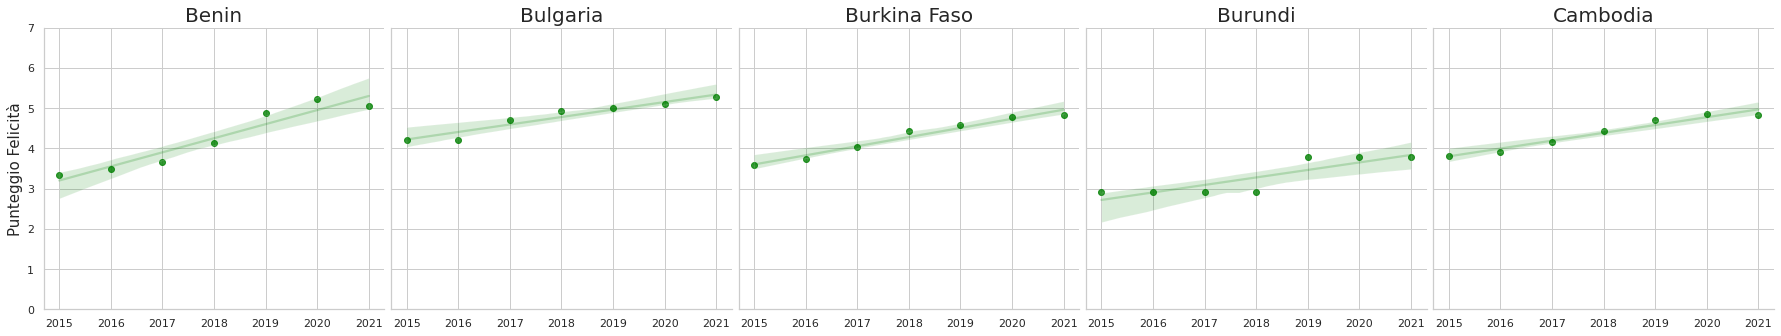

In [ ]:
ax = sns.lmplot(x='Year', y='Happiness Score', data=df1, col='Country', ci=95, col_wrap=5, 
                col_order=['Benin', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia'], line_kws={'color': 'green','alpha':0.2}, scatter_kws={'color':'green'})
ax.set(ylim=(0,7)) #senza questa viene troncato
ax.fig.subplots_adjust(wspace=.02)
ax.set_axis_labels("", "Punteggio Felicità", fontsize=15)
ax.set_titles(col_template="{col_name}", size=20);
ax.savefig("ax.png") 

In [ ]:
chart_peggiori

alt.LayerChart(...)

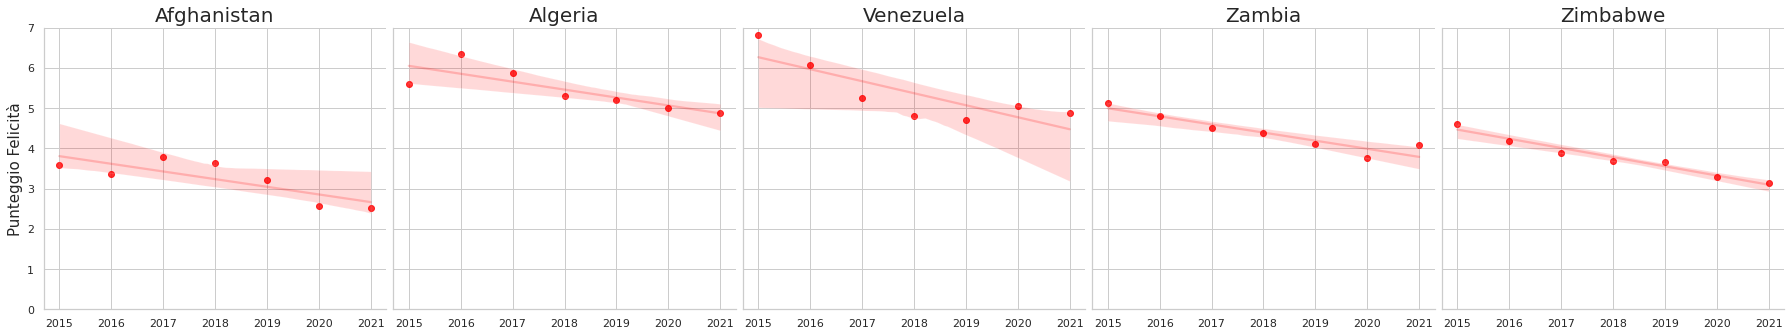

In [ ]:
ax2 = sns.lmplot(x='Year', y='Happiness Score', data=df1, col='Country', ci=95, col_wrap=5, line_kws={'color': 'red', 'alpha':0.2}, scatter_kws={'color':'red'}, 
                 col_order=['Afghanistan', 'Algeria', 'Venezuela', 'Zambia', 'Zimbabwe'])
ax2.set(ylim=(0,7)) #senza questa viene troncato
ax2.fig.subplots_adjust(wspace=.02)
ax2.set_axis_labels("", "Punteggio Felicità", fontsize=15)
ax2.set_titles(col_template="{col_name}", size=20);
ax2.savefig("ax2.png") 

In [ ]:
chart_migliori.save('chart_migliori.html')
chart_peggiori.save('chart_peggiori.html')
chart.save('chart.html')

# Visualizzazioni statiche

In [ ]:
df_1 = pd.read_csv('Ultimate2.csv')
eu1 = pd.read_csv('eu_countries.csv')
Average_working = pd.read_csv('annual-working-hours-per-worker.csv')
Average_working = Average_working.groupby('Entity', as_index=False).mean()

df_1= df_1.rename(columns={'new_value':'Indice di Povertá'})
eu = pd.merge(eu1,df_1, left_on='name', right_on='Country')
eu = eu.rename(columns={'Value': 'Suicide Rate'})
df_2 = pd.merge(df_1, Average_working, left_on='Country', right_on='Entity')
Average_working = Average_working.drop(['Unnamed: 0', 'Year'],axis=1)
df_1 = df_1.drop(['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1'],axis=1)

global_temp_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
global_temp_country_clear = global_temp_country[global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Let's Temperatura Media for each country

countries = np.unique(global_temp_country['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country[global_temp_country['Country'] == 
                                               country]['AverageTemperature'].mean())

mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                             reverse = True)))
sns.set(font_scale=0.9) 
#f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
#sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
#Text = ax.set(xlabel='Temperatura Media', title='Average land temperature in countries')

temp = pd.DataFrame(data={'Temperature':mean_temp_bar, 'Country':countries_bar})
temp = temp.drop(241)
df_temp = pd.merge(df_1, temp, on='Country')
df_temp= df_temp.rename(columns={'Temperature':'Temperatura Media', 'Tasso di suicidi':'Tasso di Suicidi'})

eu = eu.drop(['Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0.1', 'Unnamed: 0.1.1'],axis=1)
eu1 = pd.merge(eu, temp, on ='Country')
df_temp=df_temp.rename(columns={'Value':'Tasso di Suicidi', 'Happiness Score':'Punteggio di Felicitá', 'Happiness Rank':'Posizione Classifica di Felicitá'})

eu = pd.merge(eu,temp, on='Country')
eu= eu.rename(columns={'Temperature':'Temperatura Media', 'Suicide Rate':'Tasso di Suicidi'})

df_1 = df_1.rename(columns={'Value':'Tasso di Suicidi', 'Happiness Score':'Punteggio Felicitá', 'Happiness Rank':'Posizione Classifica di Felicitá'})

df_3 = df_1[df_1["Indice di Povertá"]<200]
df_3['Varianza'] = df_3['Upper_value'] - df_3['Lower_value']

Average_working = pd.read_csv('annual-working-hours-per-worker.csv')
Average_working1 = Average_working.groupby('Entity', as_index=False).mean()
Average_working = pd.merge(Average_working, Average_working1, on='Entity')

df_2 = df_2.rename(columns={'Value':'Tasso di Suicidi', 'Happiness Score':'Punteggio Felicitá', 'Happiness Rank':'Posizione Classifica di Felicitá', 'Average annual working hours per worker':'Ore medie lavorative per abitante'})
df_2 = df_2.drop(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Joinplot 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


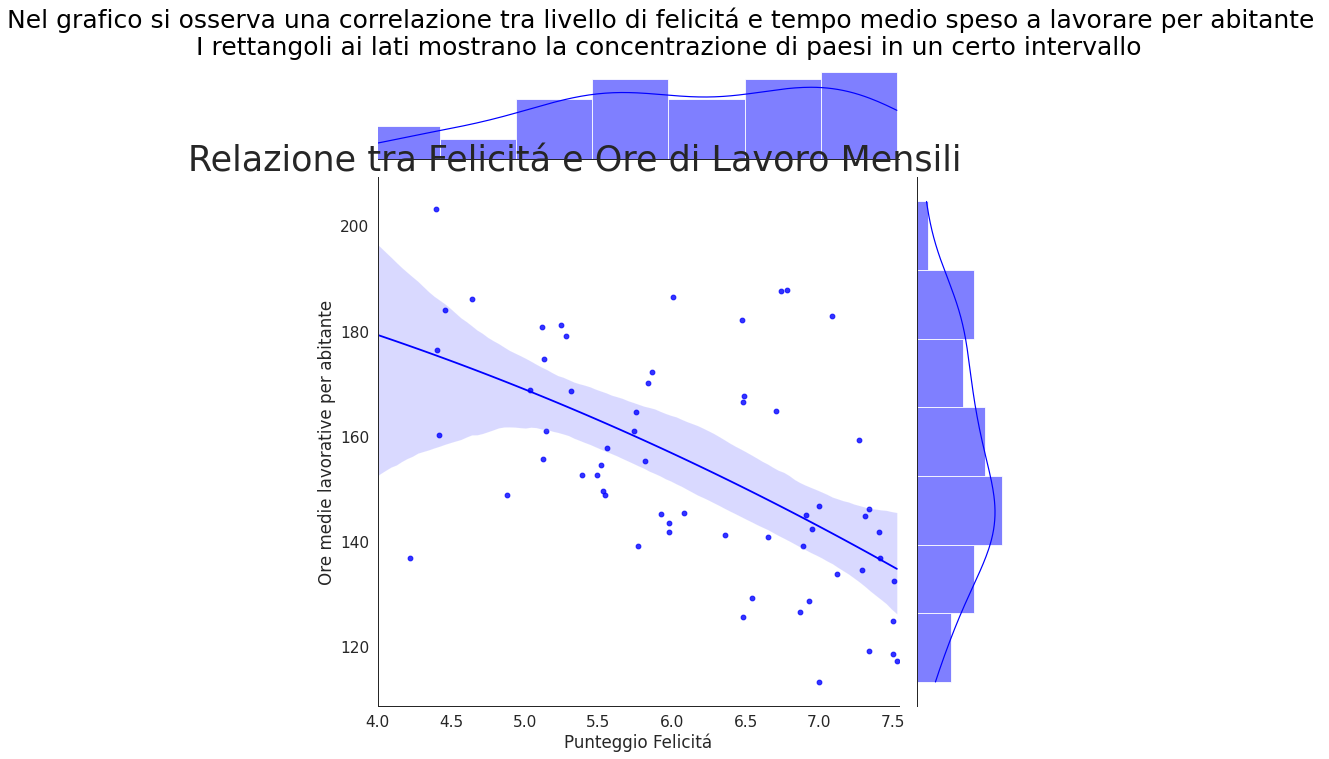

In [ ]:
#Correlazione Felicitá/Tempo speso a lavorare mondo
x = df_2['Punteggio Felicitá']
y = df_2['Ore medie lavorative per abitante']/12
z = df_2['Economy (GDP per Capita)']
sns.set_style("white")
sns.set_context("paper", font_scale=1.75)
sns.jointplot(x, y, kind='reg', height=10,order=2, xlim=(4,7.54), color='blue')
plt.suptitle('Nel grafico si osserva una correlazione tra livello di felicitá e tempo medio speso a lavorare per abitante \n I rettangoli ai lati mostrano la concentrazione di paesi in un certo intervallo', fontdict= {'verticalalignment': 'baseline',
 'horizontalalignment': 'right'},fontsize=25, y=1.06, color='black')
plt.title('Relazione tra Felicitá e Ore di Lavoro Mensili', size=35, y=1.35, fontdict= {'verticalalignment': 'baseline',
 'horizontalalignment': 'right'} ,fontweight=10)
plt.show()

## Correlogramma

In [ ]:
plt.rcParams["figure.figsize"] = (17,13)

def plot_corr_ellipses(data, ax=None, **kwargs):

    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        fig.set_size_inches(18.5, 10.5, forward=True)
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))

        labels = data.columns
        wrapped_labels = [ label.replace(' ', '\n') for label in labels ]
        xlabels = wrapped_labels
        labels = ax.set_xticklabels(xlabels)
        # for i, label in enumerate(labels):
            # label.set_y(label.get_position()[1] - (i % 2) * 0.09)
        ax.set_xticklabels(wrapped_labels)
        
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

        ax.tick_params(bottom=True, top=False, left=True, right=False)
        ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)

    return ec

In [ ]:
df_1 = df_1.rename(columns={'Economy (GDP per Capita)': 'GDP per Capita'})
df_1 = df_1.rename(columns={'Family': 'Famiglia'})
df_1 = df_1.rename(columns={'Health (Life Expectancy)': 'Aspettativa di vita'})
df_1 = df_1.rename(columns={'Freedom': 'Libertà'})
df_1 = df_1.rename(columns={'Trust (Government Corruption)': 'Fiducia nel governo'})

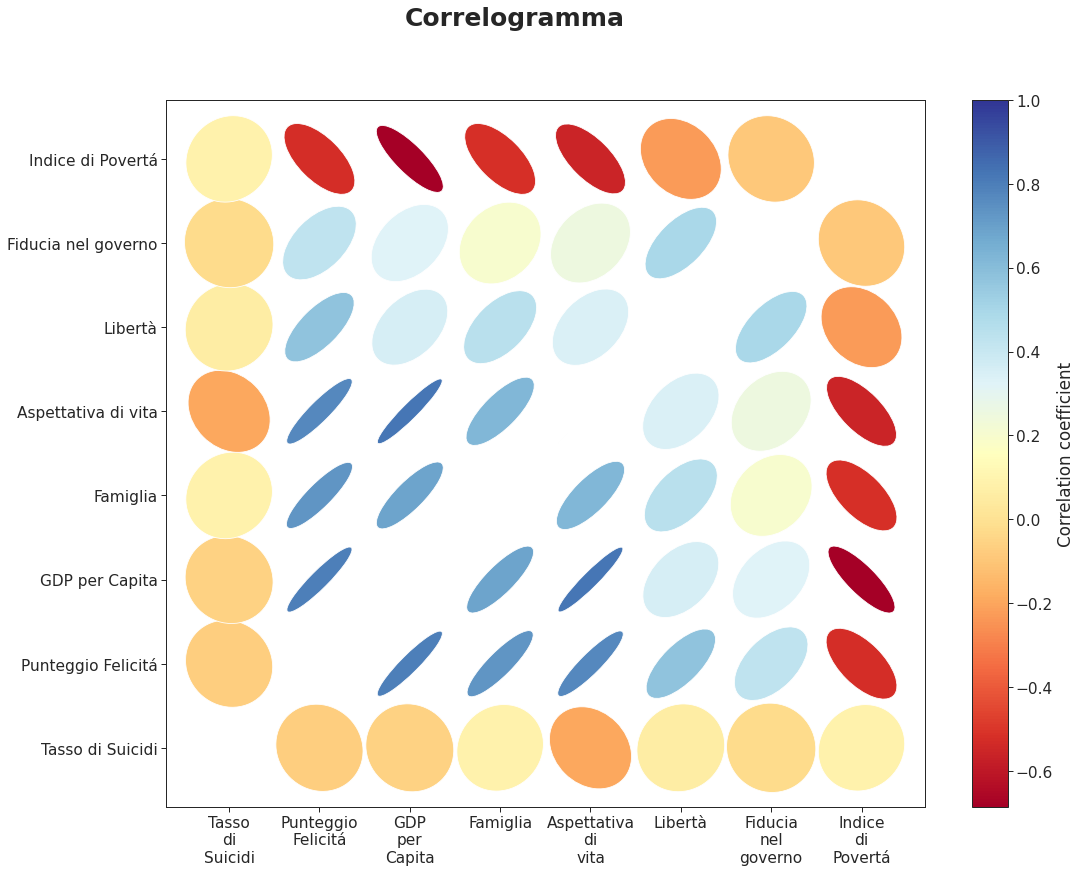

In [ ]:
data = df_1[['Tasso di Suicidi','Punteggio Felicitá', 'GDP per Capita', 'Famiglia',
       'Aspettativa di vita', 'Libertà', 'Fiducia nel governo', 'Indice di Povertá' ]].corr()

color_map = plt. cm. get_cmap('RdYlBu') 
# reversed_color_map = color_map.reversed()

fig, ax = plt.subplots(1, 1)
m = plot_corr_ellipses(data, ax=ax, cmap=color_map)
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')
ax.margins(0.1)
fig.suptitle('Correlogramma', fontweight ="bold", fontsize=25, horizontalalignment="right");
#ax.set_title('Correlogramma', fontweight ="bold", fontsize=15, horizontalalignment="center");
fig.savefig('correlogramma.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

## Joinplot 2

Text(1.0, 1.35, 'Relazione tra Felicitá e Indice di Ricchezza')

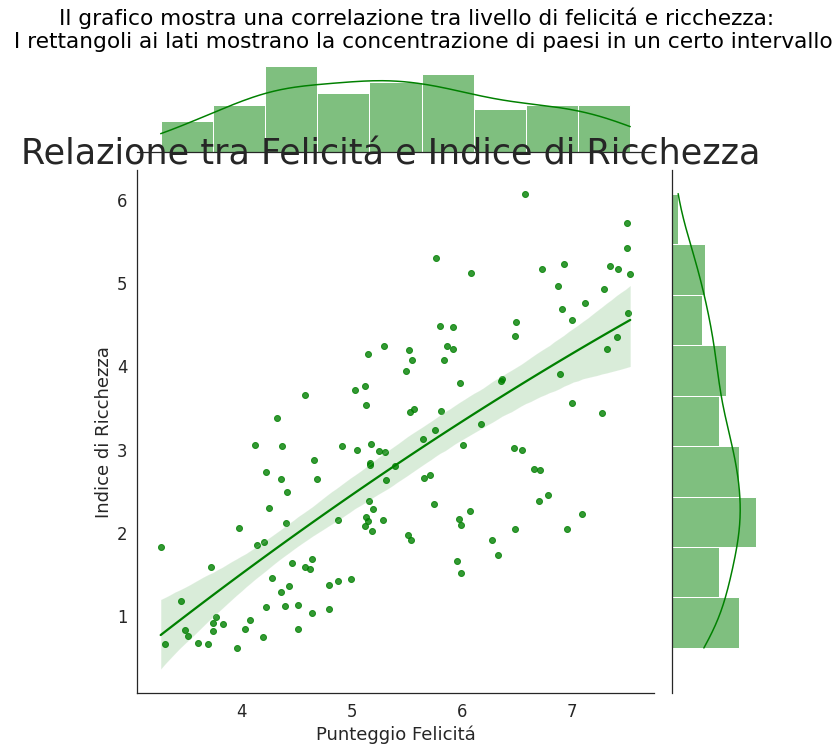

In [ ]:
df_3['Indice di Ricchezza'] = (1/df_3['Indice di Povertá'])*100
df_3[['Country', 'Indice di Ricchezza', 'Punteggio Felicitá']].head(50)

#Correlazione felicitá/benessere economico mondo
sns.set_style("white")
sns.set_context("notebook", font_scale=1.5)
rel = sns.jointplot(data=df_3, x= "Punteggio Felicitá", y="Indice di Ricchezza", kind='reg', order=2, height=10, color='green')
plt.suptitle('Il grafico mostra una correlazione tra livello di felicitá e ricchezza: \n I rettangoli ai lati mostrano la concentrazione di paesi in un certo intervallo',fontdict= {'fontsize':30,'verticalalignment': 'baseline','horizontalalignment': 'right'}, y=1.05, color='black')
plt.title(label='Relazione tra Felicitá e Indice di Ricchezza', size=35, y=1.35, loc='right', fontweight=5)

## Scatterplot

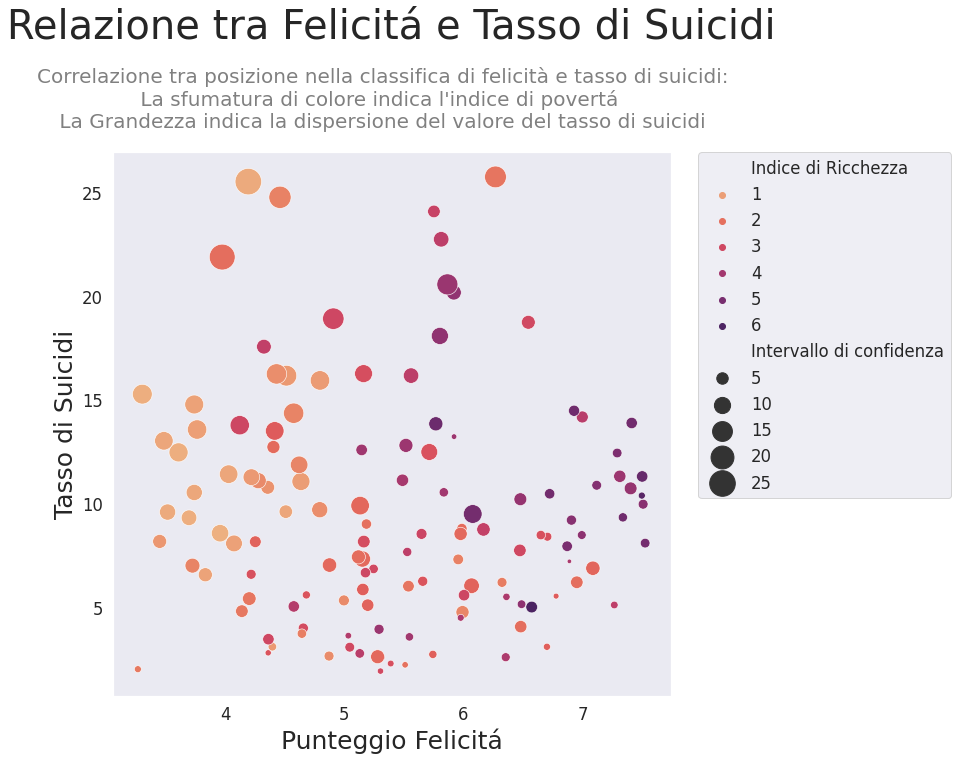

In [ ]:
df_3['Intervallo di confidenza'] = df_3['Upper_value'] - df_3['Lower_value']

plt.figure(figsize=(10,10))
sns.set_style("dark")
sns.set_context("notebook", font_scale=1.5)
ax = sns.scatterplot(data=df_3, x='Punteggio Felicitá', y='Tasso di Suicidi',size='Intervallo di confidenza', legend=True, sizes=(20,700), hue='Indice di Ricchezza', palette=sns.color_palette("flare", as_cmap=True))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('Punteggio Felicitá',fontsize=25)
ax.set_ylabel('Tasso di Suicidi',fontsize=25)
plt.title(label='Relazione tra Felicitá e Tasso di Suicidi', size=40, y=1.2, loc='center', fontweight=15)
plt.suptitle("Correlazione tra posizione nella classifica di felicità e tasso di suicidi:\n La sfumatura di colore indica l'indice di povertá  \n La Grandezza indica la dispersione del valore del tasso di suicidi ",fontdict= {'verticalalignment': 'baseline',
 'horizontalalignment': 'center'},fontweight=15, size=20, y=1, color='grey')

plt.show()